In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_columns = pd.read_csv('../datasets/restaurant_db_data_dictionary.csv')
menu_items = pd.read_csv('../datasets/menu_items.csv')
order_details = pd.read_csv('../datasets/order_details.csv')


In [3]:
dataset_columns

,Table,Field,Description
0,menu_items,menu_item_id,Unique ID of a menu item
1,menu_items,item_name,Name of a menu item
2,menu_items,category,Category or type of cuisine of the menu item
3,menu_items,price,Price of the menu item (US Dollars $)
4,order_details,order_details_id,Unique ID of an item in an order
5,order_details,order_id,ID of an order
6,order_details,order_date,Date an order was put in (MM/DD/YY)
7,order_details,order_time,Time an order was put in (HH:MM:SS AM/PM)
8,order_details,item_id,Matches the menu_item_id in the menu_items table


In [61]:
print(menu_items.shape)
menu_items.sample(10)

(32, 4)


,menu_item_id,item_name,category,price
3,104,Veggie Burger,American,10.50
2,103,Hot Dog,American,9.00
19,120,Steak Torta,Mexican,13.95
20,121,Cheese Quesadillas,Mexican,10.50
12,113,Edamame,Asian,5.00
8,109,Korean Beef Bowl,Asian,17.95
1,102,Cheeseburger,American,13.95
4,105,Mac & Cheese,American,7.00
7,108,Tofu Pad Thai,Asian,14.50
9,110,Pork Ramen,Asian,17.95


In [106]:
print(order_details.shape)
order_details.head()

(12097, 4)


,order_details_id,order_id,item_id,order_datetime
12229,12230,5369,109,2023-03-31 22:05:04
12230,12231,5369,129,2023-03-31 22:05:04
12231,12232,5369,120,2023-03-31 22:05:04
12232,12233,5369,122,2023-03-31 22:05:04
12233,12234,5370,122,2023-03-31 22:15:48


In [ ]:
order_details.head()

In [ ]:
order_details.info()

In [ ]:
order_details.isna().sum()

In [ ]:
order_details.dropna(inplace=True)
order_details.drop_duplicates(inplace=True)
order_details.info()

In [ ]:
order_details['item_id'] = order_details['item_id'].astype('int64')
order_details.info()

In [ ]:
order_details['order_datetime'] = pd.to_datetime(order_details['order_date'] + ' ' + order_details['order_time'], format='%m/%d/%y %I:%M:%S %p')
order_details = order_details.drop(['order_date', 'order_time'], axis=1)
order_details.info()

- ¿Qué categorías venden más, qué día y a qué hora por mes?
- ¿Qué categorías suelen pedirse juntas en la misma orden? Por día, semana y mes
- ¿Qué productos son los más vendidos cada día, cada semana y cada mes?

In [ ]:
union = menu_items.merge(order_details, how='inner', left_on='menu_item_id', right_on='item_id')
union.head()

In [ ]:
union.drop(['menu_item_id', 'order_details_id'], axis=1, inplace=True)
union.sample(10)

In [ ]:
union['day_of_week'] = union['order_datetime'].dt.day_name()
categories_by_day = union.groupby(['day_of_week', 'category'], as_index=False)['price'].sum()
categories_by_day

In [62]:
total_by_day = union.groupby(['day_of_week'], as_index=False)['price'].sum()
total_by_day.sort_values(by='price', ascending=False).reset_index(drop=True)

,day_of_week,price
0,Monday,26007.45
1,Friday,23707.95
2,Tuesday,23356.00
3,Sunday,23226.45
4,Thursday,21846.85
5,Saturday,21170.90
6,Wednesday,19902.30


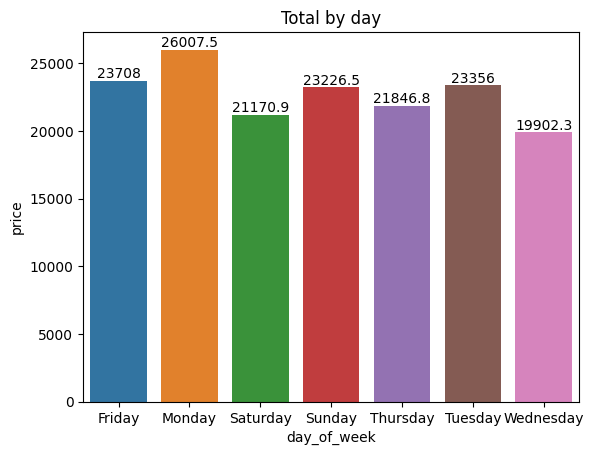

In [99]:
ax = sns.barplot(total_by_day, x="day_of_week", y="price", hue='day_of_week', estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Total by day')
plt.show()

In [ ]:
union['order_datetime'].dt.time.sort_values()

In [ ]:
union['hour_minute'] = union['order_datetime'].dt.hour.astype(str).str.zfill(2) + ':' + union['order_datetime'].dt.minute.astype(str).str.zfill(2)
union['hour_minute'] = pd.to_datetime(union['hour_minute'], format='%H:%M')
time_bins = [
    pd.to_datetime(f"{00}:{00}", format='%H:%M'),
    pd.to_datetime(f"{10}:{00}", format='%H:%M'),
    pd.to_datetime(f"{12}:{00}", format='%H:%M'),
    pd.to_datetime(f"{14}:{00}", format='%H:%M'),
    pd.to_datetime(f"{17}:{00}", format='%H:%M'),
    pd.to_datetime(f"{19}:{00}", format='%H:%M'),
    pd.to_datetime(f"{23}:{59}", format='%H:%M')
]
time_labels = ['Night', 'Morning', 'Noon', 'Afternoon', 'Early evening', 'Evening']
union['time_range'] = pd.cut(union['hour_minute'], bins=time_bins, labels=time_labels, right=False)
union.drop('hour_minute', axis=1, inplace=True)
union.sample(10)

In [63]:
union['time_range'] = union['time_range'].cat.remove_unused_categories()
categories_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()
categories_by_time_range

C:\Users\andre\AppData\Local\Temp\ipykernel_16584\2085999429.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()


,time_range,category,price
0,Morning,American,1448.75
1,Morning,Asian,2701.50
2,Morning,Italian,2134.95
3,Morning,Mexican,1900.65
4,Noon,American,7729.35
5,Noon,Asian,12000.10
6,Noon,Italian,13404.55
7,Noon,Mexican,9224.65
8,Afternoon,American,6280.05
9,Afternoon,Asian,10672.80


In [ ]:
ax = sns.barplot(categories_by_time_range, x="day_of_week", y="price", hue='day_of_week', estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Total by day')
plt.show()

In [ ]:
union['time_range'] = union['time_range'].cat.remove_unused_categories()
union['time_range'].value_counts()

In [102]:
total_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()
total_by_time_range.sort_values(by='price', ascending=False).reset_index(drop=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_16584\1010250226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()


,time_range,category,price
0,Noon,Italian,13404.55
1,Noon,Asian,12000.10
2,Evening,Italian,11893.50
3,Afternoon,Italian,11250.10
4,Evening,Asian,11101.20
5,Early evening,Italian,10779.60
6,Afternoon,Asian,10672.80
7,Early evening,Asian,10245.05
8,Noon,Mexican,9224.65
9,Evening,Mexican,8255.80


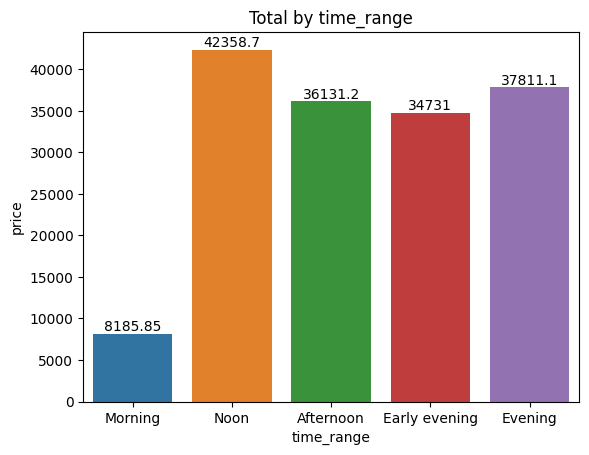

In [103]:
ax = sns.barplot(total_by_time_range, x="time_range", y="price", hue='time_range', estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Total by time_range')
plt.show()

In [66]:
total_by_time_range_by_day = union.groupby(['day_of_week', 'time_range', 'category'], as_index=False)['price'].sum()
total_by_time_range_by_day.sort_values(by='price', ascending=False).reset_index(drop=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_16584\2923499057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_time_range_by_day = union.groupby(['day_of_week', 'time_range', 'category'], as_index=False)['price'].sum()


,day_of_week,time_range,category,price
0,Monday,Evening,Italian,2601.60
1,Sunday,Noon,Italian,2560.40
2,Tuesday,Evening,Italian,2459.90
3,Monday,Evening,Asian,2344.00
4,Friday,Noon,Asian,2304.95
...,...,...,...,...
135,Sunday,Morning,American,195.20
136,Friday,Morning,American,193.60
137,Wednesday,Morning,American,174.50
138,Monday,Morning,American,161.80


¿Por qué quiero saber qué día se vende más cada categoría?

¿Por qué quiero saber a qué hora se vende más cada categoría?